In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_excel('eur_rub.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    274 non-null    datetime64[ns]
 1   Cur     274 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 KB


In [5]:
df = df.sort_values(by='Date').reset_index(drop=True)

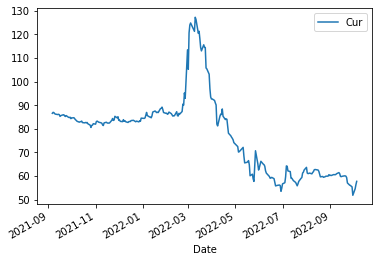

In [6]:
df.set_index('Date').plot()

In [7]:
date0510 = df.iloc[-1]
df = df.drop(len(df)-1,axis=0)

In [8]:
date0510['Cur']

57.7078

In [9]:
df.set_index('Date', inplace=True)

In [10]:
#функция по созданию сгенерерованных признаков
def make_features(data, max_lag, rolling_min_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['is_weekend'] = data.index.isin([5,6])*1
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['Cur'].shift(lag)
    
    data['y_mean'] = data['Cur'].shift().rolling(rolling_min_size).mean().copy()

In [11]:
make_features(df,30,3)

In [12]:
df

,Cur,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,...,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,y_mean
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-06,86.5670,2021,9,6,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-07,86.9602,2021,9,7,1,0,86.5670,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-08,86.8606,2021,9,8,2,0,86.9602,86.5670,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-09,86.4067,2021,9,9,3,0,86.8606,86.9602,86.5670,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.795933
2021-09-10,86.2092,2021,9,10,4,0,86.4067,86.8606,86.9602,86.5670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.742500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28,55.6107,2022,9,28,2,0,55.9617,56.0740,57.0335,59.3158,...,59.9272,59.8881,59.6461,59.5435,59.4359,59.7827,59.6211,60.8438,61.9675,56.356400
2022-09-29,55.3639,2022,9,29,3,0,55.6107,55.9617,56.0740,57.0335,...,60.5269,59.9272,59.8881,59.6461,59.5435,59.4359,59.7827,59.6211,60.8438,55.882133
2022-09-30,51.7974,2022,9,30,4,0,55.3639,55.6107,55.9617,56.0740,...,60.1813,60.5269,59.9272,59.8881,59.6461,59.5435,59.4359,59.7827,59.6211,55.645433


In [13]:
df.dropna(inplace=True)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Cur', axis=1),
                                                df.Cur,
                                                shuffle = False,
                                                test_size=0.19)

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
print('Ошибка на Train ', round(mean_absolute_error(y_train, lr.predict(X_train)),2))

Ошибка на Train  1.38


In [18]:
print('Ошибка на Test ', round(mean_absolute_error(y_test, lr.predict(X_test)),2))

Ошибка на Test  0.77


# Предсказываем на 05.10

In [19]:
df_new = df['Cur'].copy()
df_new = pd.DataFrame(df_new).reset_index()

In [20]:
df_concat = df_new.tail(1).copy()

In [21]:
df_concat['Date'] = pd.to_datetime('2022-10-05')

In [22]:
df_concat['Cur'] = 0

In [23]:
df_concat

,Date,Cur
242,2022-10-05,0


In [24]:
df_v2 = pd.concat([df_new,df_concat],ignore_index=True)

In [25]:
df_v2

,Date,Cur
0,2021-10-18,82.5112
1,2021-10-19,82.6711
2,2021-10-20,82.5373
3,2021-10-21,82.6744
4,2021-10-22,82.1310
...,...,...
239,2022-09-29,55.3639
240,2022-09-30,51.7974
241,2022-10-03,54.5446
242,2022-10-04,56.2911


# Генерируем фичи для 05.10

In [26]:
df_v2.set_index('Date', inplace=True)

In [27]:
make_features(df_v2,30,3)

In [28]:
df_v2.drop('Cur',axis=1).tail(1)

,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,y_mean
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-05,2022,10,5,2,0,56.2911,54.5446,51.7974,55.3639,55.6107,...,60.5658,60.1732,60.3267,60.1813,60.5269,59.9272,59.8881,59.6461,59.5435,54.211033


In [29]:
print('Предсказание Euro на 05.10.2022 - ',lr.predict(df_v2.drop('Cur',axis=1).tail(1))[0])

Предсказание Euro на 05.10.2022 -  55.716575829081194
